# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

/Users/tiffanywilliams/miniconda3/envs/ds-sf/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
# TODO
df.shape

(400, 4)

Answer: There are 400 observations in the dataset.

> ### Question 2.  Create a summary table.

In [4]:
# TODO
df.describe()

/Users/tiffanywilliams/miniconda3/envs/ds-sf/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [5]:
# TODO
print "gre variance: {}, gpa variance: {}".format(df.var()['gre'], df.var()['gpa'])

gre variance: 13369.9530398, gpa variance: 0.144879486222


Answer: The gre has a larger variance than the gpa because the gre distribution (220, 800) is significantly larger than that of the gpa (2.26, 4.0).

> ### Question 4.  Drop data points with missing data.

In [6]:
# TODO
df = df.dropna()
df.shape

(397, 4)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [7]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: One way to confirm would be to get a summary table (shown above).  Quantile values are no longer NaN, suggesting that there are no NaN values in the table.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

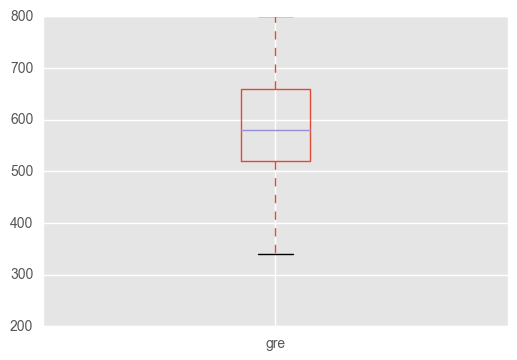

In [8]:
# TODO
df.gre.plot.box()

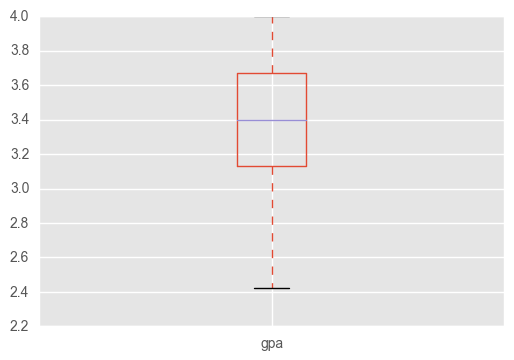

In [9]:
# TODO
df.gpa.plot.box()

> ### Question 7.  What do boxplots show?

Answer: Boxplots show the distribution of data.  Specifically, the following statistical metrics are displayed on the graph: minimum, first quartile, median, third quartile, and maximum.  

> ### Question 8.  Plot the distribution of each variable.

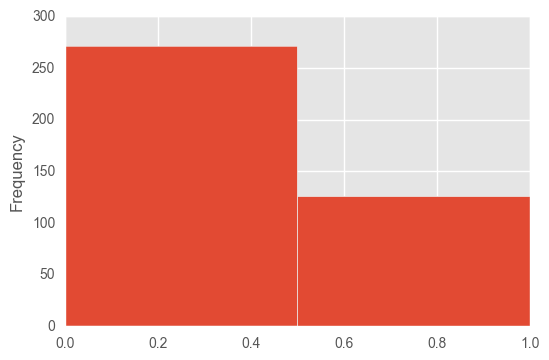

In [10]:
# TODO
df.admit.plot.hist(bins=2)

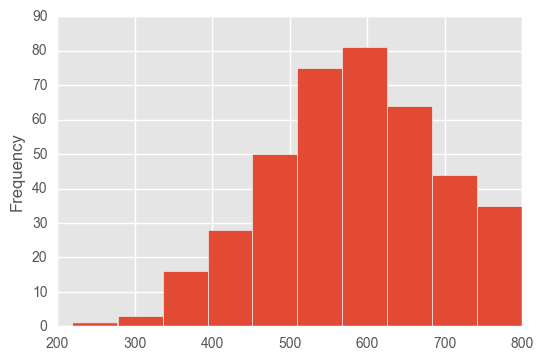

In [11]:
# TODO
df.gre.plot.hist()

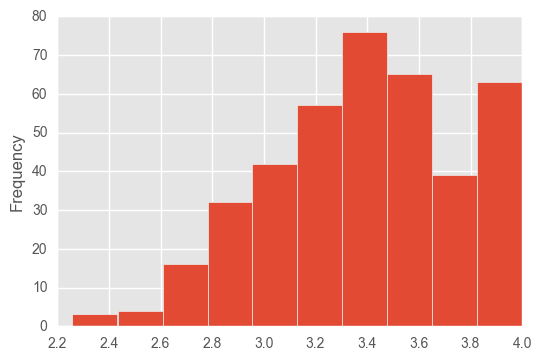

In [12]:
# TODO
df.gpa.plot.hist()

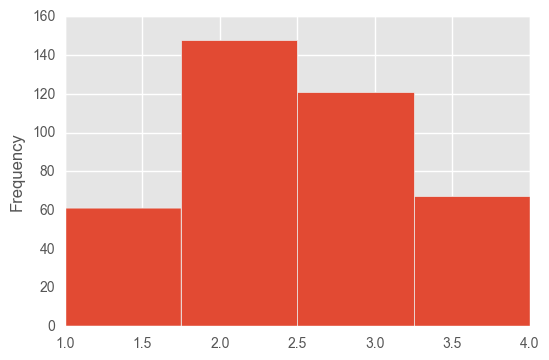

In [13]:
# TODO
df.prestige.plot.hist(bins=4)

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: Based on looking at the histograms above, it appears as if the normal distribution requirement would not be met for the gpa and gre. Distribution could be corrected by removing outliers (see a few cells below).  While normal distribution assumption could also be checked by creating a linear model between the features (gre and gpa) and the admittance and generating a q-q plot of the residuals against a normal distribution, it appears to not be a good method for checking normal distibution when the response variables are binary/categorical (see cells immediately below).  

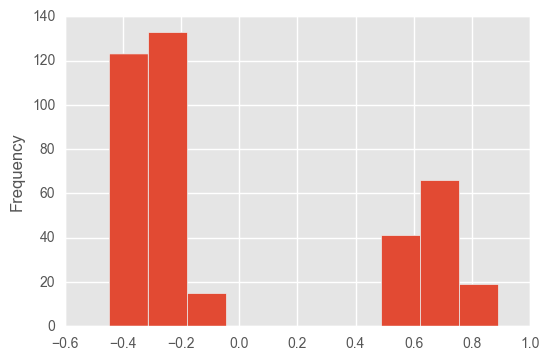

In [15]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'admit ~ gpa', data = df).fit()

model.resid.plot(kind = 'hist')

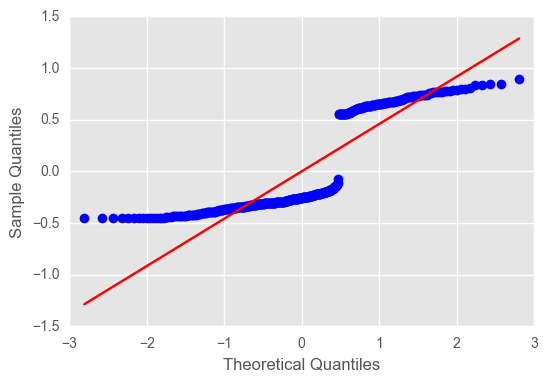

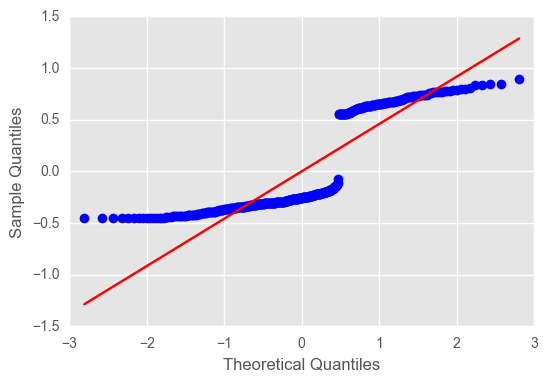

In [16]:
sm.qqplot(model.resid, line = 's')

In [17]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [18]:
# TODO 
pre_outlier_df = df
def drop_gre_and_gpa_outliers(df):
    print 'Dropping GRE outliers'
    print '- n (before GRE) =', df.shape[0]
    Q1 = df.gre.quantile(0.25)
    Q2 = df.gre.quantile(0.5)
    Q3 = df.gre.quantile(0.75)
    # TODO
    IQR = Q3 - Q1
    print '- Q1 GRE        =', Q1
    print '- Q2/Median GRE =', Q2
    print '- Q3 GRE        =', Q3

    # TODO
    df.drop(df[(df.gre < Q1 - 1.5 * IQR) | (df.gre > Q3 + 1.5 * IQR)].index, 
           inplace = True)

    print '- n (after GRE)  =', df.shape[0]
    
    print 'Dropping GPA outliers'
    print '- n (before GPA) =', df.shape[0]
    Q1 = df.gpa.quantile(0.25)
    Q2 = df.gpa.quantile(0.5)
    Q3 = df.gpa.quantile(0.75)
    # TODO
    IQR = Q3 - Q1
    print '- Q1 GPA        =', Q1
    print '- Q2/Median GPA =', Q2
    print '- Q3 GPA        =', Q3

    # TODO
    df.drop(df[(df.gpa < Q1 - 1.5 * IQR) | (df.gpa > Q3 + 1.5 * IQR)].index, 
           inplace = True)

    print '- n (after GPA)  =', df.shape[0]
drop_gre_and_gpa_outliers(df)

Dropping GRE outliers
- n (before GRE) = 397
- Q1 GRE        = 520.0
- Q2/Median GRE = 580.0
- Q3 GRE        = 660.0
- n (after GRE)  = 393
Dropping GPA outliers
- n (before GPA) = 393
- Q1 GPA        = 3.14
- Q2/Median GPA = 3.4
- Q3 GPA        = 3.67
- n (after GPA)  = 392


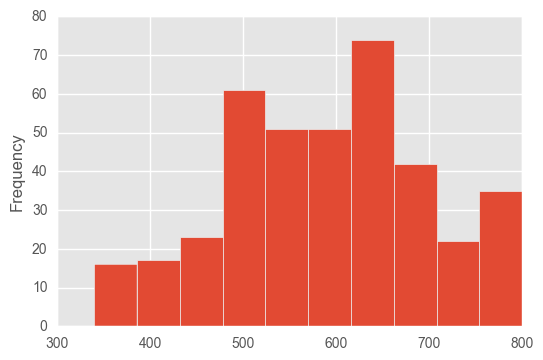

In [19]:
# TODO
df.gre.plot.hist()

Answer:

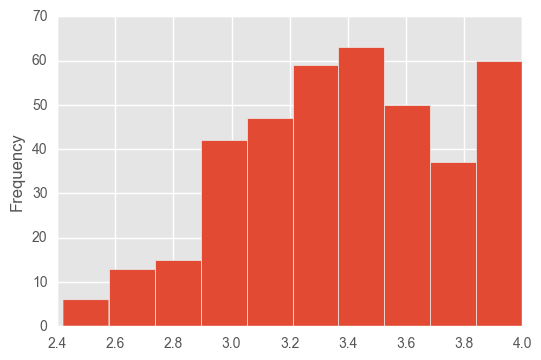

In [20]:
df.gpa.plot.hist()

> ### Question 10.  Create a correlation matrix for the dataset

In [21]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181976,0.172239,-0.237270
gre,0.181976,1.000000,0.357025,-0.109055
gpa,0.172239,0.357025,1.000000,-0.043483
prestige,-0.237270,-0.109055,-0.043483,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: It appears as if the gre and the gpa are weakly colinear (0.357025).  There is a weak negative correlation between prestige and admitance (-0.237270).  There is no linearity between prestige and gpa.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: 
Check for missing data and remove those observations.
Plot the distribution of the data.
Remove outliers.
Check distribution of data that exhibit normal distribution.
Check for colinearity.
Create a linear model between graduate school admission rates and undergrad prestige.
Check the coefficient significance.
Check the model fit.
Iterate the last two steps until satisfied.


> ### Question 13.  What is your hypothesis?

Answer:  The null hypothesis is that there is no linear association betwen graduate school admission rates and prestige of undergraduate schools.